# E-Commerce Cart Abandonment Prediction

- Name: **Fahrettin Ege Bilge**
- ID: **21070001052**
- Instructor: **Assoc. Prof. Dr. Ömer ÇETİN**

## Table Of Contents

1. [Introduction](#Introduction)
2. [Preprocessing](#Preprocessing)
    - [Overview of Preprocessing Steps](#Overview-of-Preprocessing-Steps)
3. [Split Dataset](#Split-Dataset)
4. [Machine Learning Algorithm Selection](#Machine-Learning-Algorithm-Selection)
    - [1. Logistic Regression: A baseline algorithm for binary classification.](#1.-Logistic-Regression:-A-baseline-algorithm-for-binary-classification.)
    - [2.K-Nearest Neighbors (KNN): A distance-based classification model.](#2.K-Nearest-Neighbors-(KNN):-A-distance-based-classification-model.)
    - [3. Support Vector Machines (SVM): Clear decision boundary for classification tasks.](#3.-Support-Vector-Machines-(SVM):-Clear-decision-boundary-for-classification-tasks.)
    - [4. Naive Bayes: Complements one-hot encoding.](#4.-Naive-Bayes:-Complements-one-hot-encoding.)
    - [5. ANN: A Costly Solution](5.ANN:-A-costly-solution.)
    - [6. Random Forest](#6.-Random-Forest) 
5. [Evaluation Metrics](#Evaluation-Metrics)
    - [Accuracy](#Accuracy)
    - [Precision](#Precision)
    - [Recall](#Recall)
    - [F1-Score](#F1-Score)
    - [Confusion Matrix](#Confusion-Matrix)
6. [Results](#Results)
7. [Conclusion](#Conclusion)
8. [Appendices](#Appendices)
    - [Appendix A: Performance Metrics](#Appendices)
    - [Appendix B: Confusion Matrices](#Appendices)
9. [References](#References)


## Introduction
Predicting cart abandonment is crucial for e-commerce platforms to reduce lost revenue and improve user experience. This project uses supervised learning techniques to predict the likelihood of users abandoning their carts based on features like cart contents, payment methods, and purchase history.

## Preprocessing
### Overview of Preprocessing Steps
1. Filtering Relevant Rows:
- Rows with status values other than canceled and complete were removed.
- Justification: canceled maps to abandoned = 1, while complete maps to abandoned = 0. Other statuses do not provide relevant information for this task.
2. Handling Categorical Features:
- Categorical variables (category_name_1 and payment_method) were one-hot encoded.
- Justification: One-hot encoding ensures that these variables are represented in a format suitable for machine learning models without assuming any ordinal relationship.
3. Handling Numerical Features:
- Numerical features (price, grand_total, discount_amount, total_purchases, and total_orders) were scaled using MinMaxScaler.
- Justification: Scaling ensures that all features are normalized, preventing features with large magnitudes from dominating the model.
4. Outlier Handling:
- Numerical columns were clipped at the 95th percentile to mitigate the effect of outliers.
- Justification: Outliers can disproportionately influence certain machine learning models like Logistic Regression or KNN.
5. Tracking Customer History:
- Aggregated total_purchases (sum of grand_total for each customer) and total_orders (number of orders per customer) were added as features.
- Justification: These features provide insights into customer behavior and engagement, which are critical for predicting cart abandonment.
6. Balancing the Dataset:
- Undersampling was used to balance the dataset by ensuring equal representation of abandoned (1) and not abandoned (0) classes.
- Justification: An imbalanced dataset can bias the model towards the majority class.

In [1]:
import helper as hlp
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
kaggle_dataset = 'data/kaggle_dataset/Pakistan_Largest_Ecommerce_Dataset.csv'
preprocessed_dataset = 'data/preprocessed_dataset/preprocessed_dataset.csv'


### Preprocess of Data

In [3]:
hlp.preprocess_dataset(kaggle_dataset, preprocessed_dataset)

/Users/egebilge/Developer/GitHub/E-commerce-Cart-Abandonment-Prediction/helper.py:11: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file)


Preprocessed dataset saved to data/preprocessed_dataset/preprocessed_dataset.csv


### Visualization Of Preprocessed Data

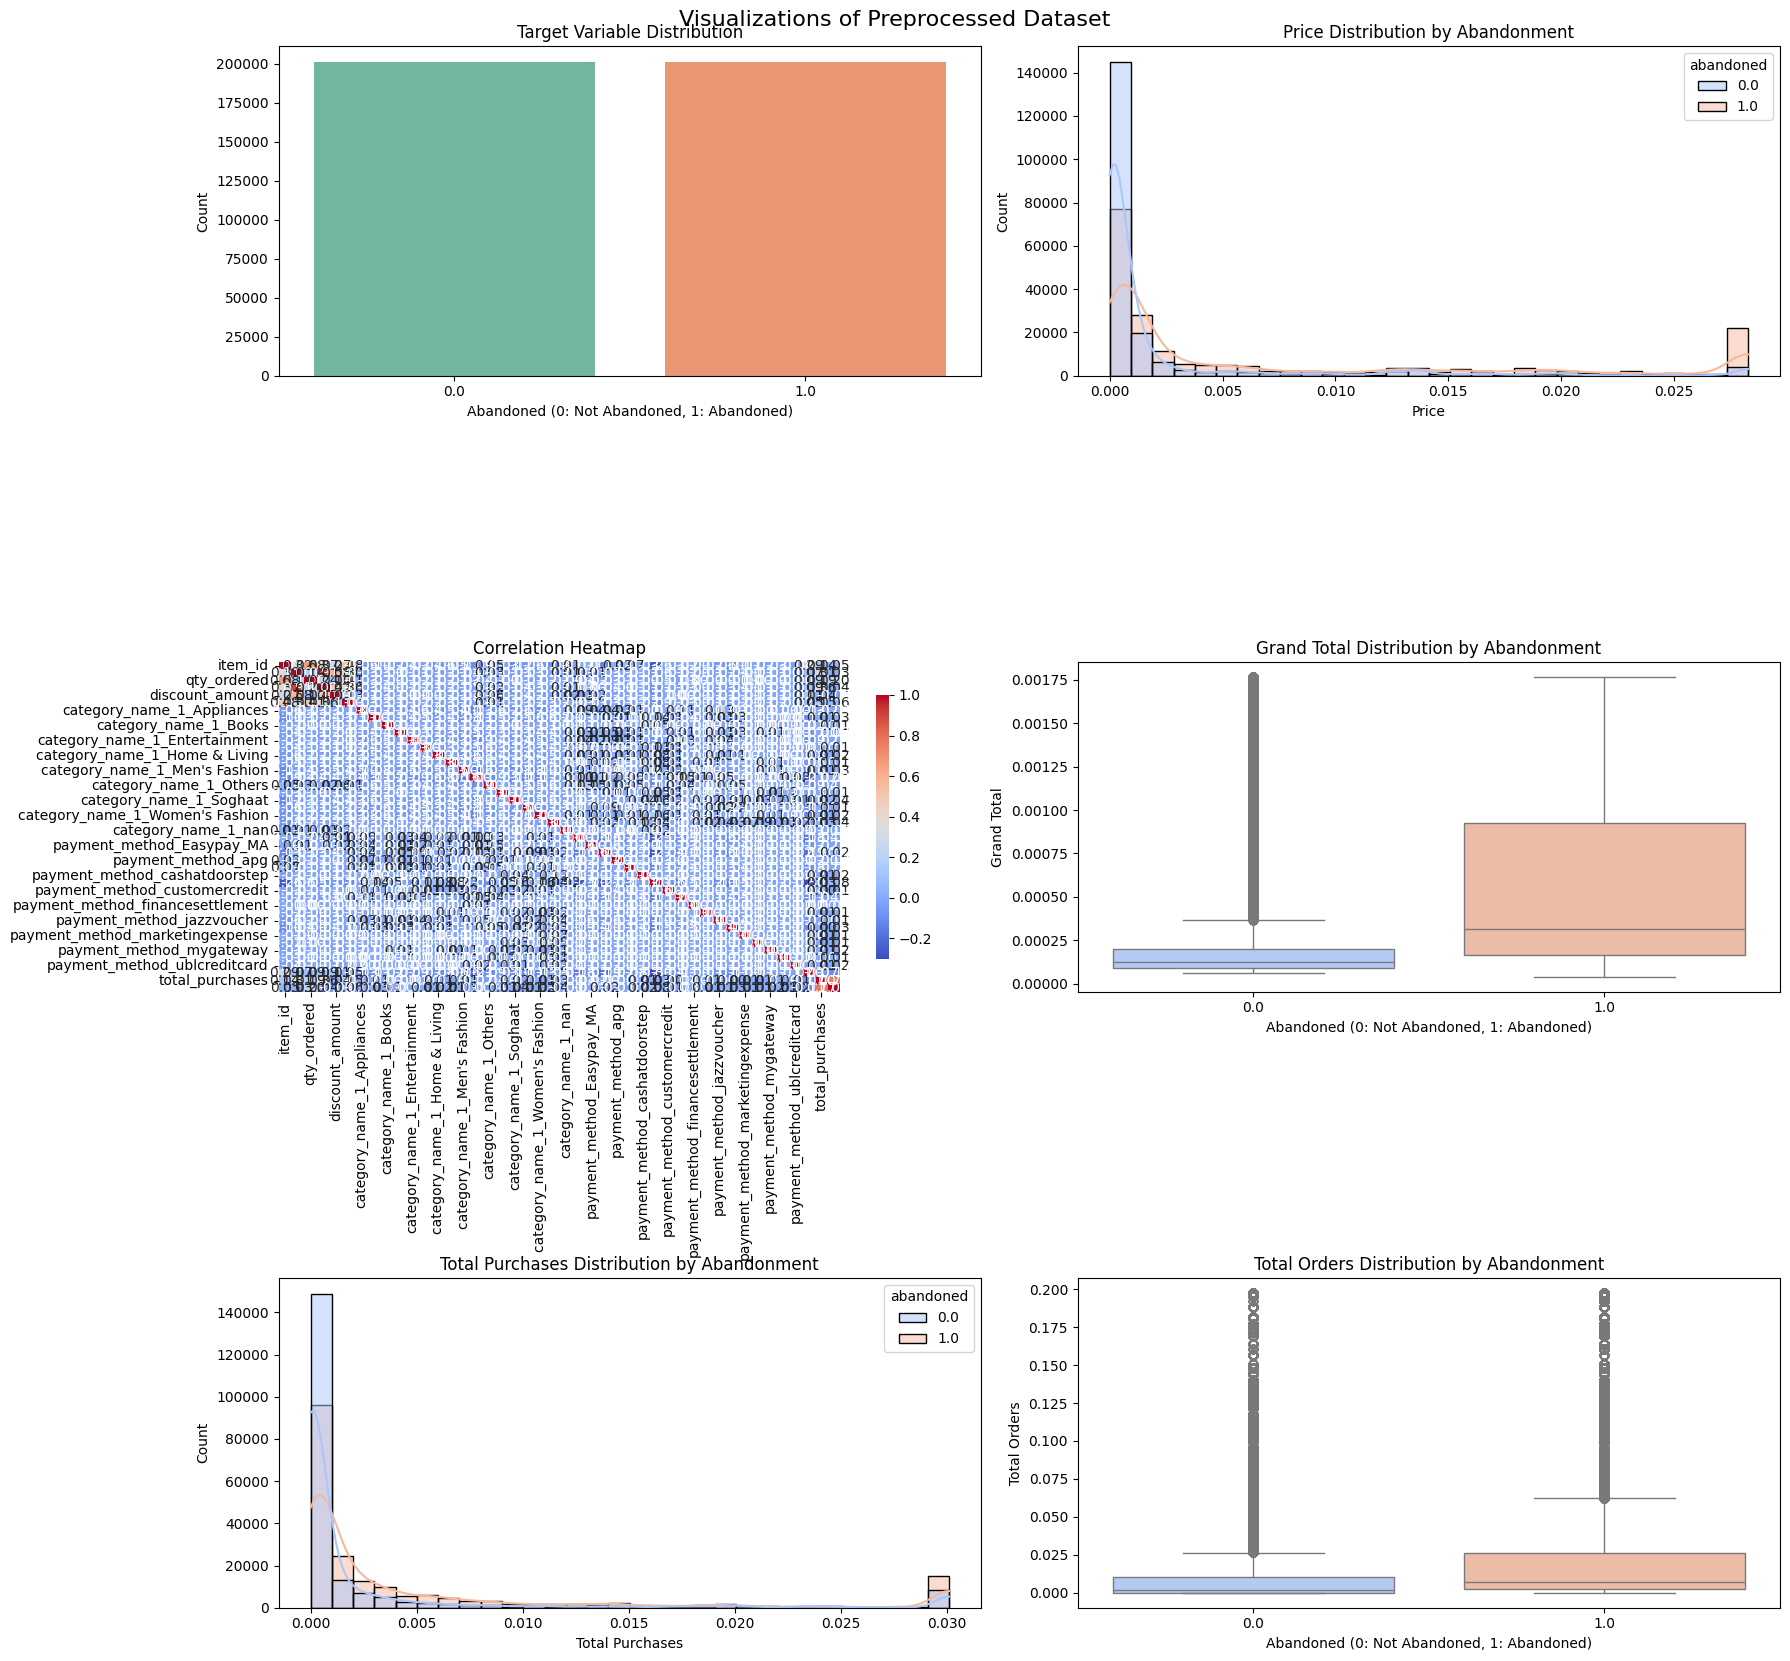

In [4]:
hlp.visualize_preprocessed_data(preprocessed_dataset)

## Split Dataset
To train and evaluate machine learning models effectively, the dataset is split into training and testing subsets. This ensures that the model is trained on one portion of the data and evaluated on unseen data to measure its performance. 

#### Steps:
1. **Train-Test Split**: 
   - The dataset is split into 80% training data and 20% testing data.
2. **Stratification**: 
   - Stratified splitting ensures that the class distribution (abandoned vs. not abandoned) is preserved in both the training and testing datasets.
3. **Random State**: 
   - Setting a `random_state` ensures reproducibility of results.

In [5]:
# Load the dataset
df = pd.read_csv(preprocessed_dataset) 

# Ensure 'abandoned' is in the dataframe (required for splitting)
if 'abandoned' not in df.columns:
    raise ValueError("'abandoned' column is missing. Ensure preprocessing includes this target variable.")

# Define features (X) and target variable (y)
X = df.drop(columns=['abandoned'])  # Features
y = df['abandoned']                # Target variable

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,          # 20% of the data for testing
    stratify=y,             # Preserve class distribution
    random_state=42         # Ensure reproducibility
)

# Display shapes and class distribution
print("Dataset Split Information:")
print(f"Training data shape: {X_train.shape} (Features), {y_train.shape} (Target)")
print(f"Testing data shape: {X_test.shape} (Features), {y_test.shape} (Target)")

# Display class distribution in training and testing sets
train_class_distribution = y_train.value_counts(normalize=True).to_dict()
test_class_distribution = y_test.value_counts(normalize=True).to_dict()

print("\nClass Distribution in Training Data:")
for class_label, proportion in train_class_distribution.items():
    print(f"  Class {class_label}: {proportion:.2%}")

print("\nClass Distribution in Testing Data:")
for class_label, proportion in test_class_distribution.items():
    print(f"  Class {class_label}: {proportion:.2%}")


Dataset Split Information:
Training data shape: (321998, 43) (Features), (321998,) (Target)
Testing data shape: (80500, 43) (Features), (80500,) (Target)

Class Distribution in Training Data:
  Class 1.0: 50.00%
  Class 0.0: 50.00%

Class Distribution in Testing Data:
  Class 0.0: 50.00%
  Class 1.0: 50.00%


## Machine Learning Algorithm Selection
Justification for Algorithm Choices

1. Logistic Regression:
- Chosen for its simplicity, interpretability, and efficiency on linearly separable data.
- It also provides probabilities for predictions, making it suitable for understanding the likelihood of cart abandonment.
2. K-Nearest Neighbors (KNN):
- A non-parametric algorithm that uses similarity measures to make predictions.
- Effective for capturing local patterns and relationships in the data.
3. Support Vector Machines (SVM):
- Robust to high-dimensional spaces and outliers, making it a good choice for scaled numerical features.
- Provides a clear decision boundary for classification tasks.
4. Naive Bayes:
- Efficient and works well for categorical data due to its assumption of feature independence.
- It complements the one-hot encoded categorical features in our dataset.

In [6]:
# Initialize models
logistic_regression = LogisticRegression(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
svm = LinearSVC(random_state=42, max_iter=100000,verbose=True)
naive_bayes = GaussianNB()
# Add ANN (MLPClassifier) to the pipeline
ann = MLPClassifier(
    hidden_layer_sizes=(128, 64),  # Two hidden layers with 128 and 64 neurons
    activation='relu',            # ReLU activation function
    solver='adam',                # Adam optimizer
    max_iter=200,                 # Maximum number of iterations
    random_state=42               # Reproducibility
)
random_forest = RandomForestClassifier(n_estimators=100, max_depth=None,random_state=42)

# Store results
results = []

### 1. Logistic Regression: A baseline algorithm for binary classification.

In [7]:
results.append(hlp.evaluate_model(logistic_regression, X_train, y_train, X_test, y_test, "Logistic Regression"))

Performance of Logistic Regression:
  Accuracy: 0.68
  Precision: 0.66
  Recall: 0.73
  F1-Score: 0.69
  Training Time: 1.58 seconds
  Evaluation Time: 0.01 seconds
  Memory Used: 77.80 MB
  Confusion Matrix:
[[25424 14826]
 [10958 29292]]



### 2.K-Nearest Neighbors (KNN): A distance-based classification model.

In [8]:
results.append(hlp.evaluate_model(knn, X_train, y_train, X_test, y_test, "K-Nearest Neighbors"))

Performance of K-Nearest Neighbors:
  Accuracy: 0.76
  Precision: 0.75
  Recall: 0.78
  F1-Score: 0.76
  Training Time: 0.57 seconds
  Evaluation Time: 10.56 seconds
  Memory Used: 29.83 MB
  Confusion Matrix:
[[29619 10631]
 [ 8754 31496]]



### 3. Support Vector Machines (SVM): Clear decision boundary for classification tasks.

In [9]:
results.append(hlp.evaluate_model(svm, X_train, y_train, X_test, y_test, "Support Vector Machines"))

[LibLinear]iter  1 act 1.941e+04 pre 1.941e+04 delta 4.543e-07 f 3.220e+05 |g| 8.545e+10 CG   1
[LibLinear]iter  1 act 1.941e+04 pre 1.941e+04 delta 4.543e-07 f 3.220e+05 |g| 8.545e+10 CG   1
Performance of Support Vector Machines:
  Accuracy: 0.63
  Precision: 0.58
  Recall: 1.00
  F1-Score: 0.73
  Training Time: 0.86 seconds
  Evaluation Time: 0.00 seconds
  Memory Used: 8.94 MB
  Confusion Matrix:
[[10789 29461]
 [    0 40250]]



### 4. Naive Bayes: Complements one-hot encoding.

In [10]:
results.append(hlp.evaluate_model(naive_bayes, X_train, y_train, X_test, y_test, "Naive Bayes"))

Performance of Naive Bayes:
  Accuracy: 0.68
  Precision: 0.66
  Recall: 0.77
  F1-Score: 0.71
  Training Time: 0.72 seconds
  Evaluation Time: 0.02 seconds
  Memory Used: 0.20 MB
  Confusion Matrix:
[[24088 16162]
 [ 9259 30991]]



### 5.ANN: A costly solution.

In [11]:
results.append(hlp.evaluate_model(ann, X_train, y_train, X_test, y_test, "Artificial Neural Network (ANN)"))

Performance of Artificial Neural Network (ANN):
  Accuracy: 0.68
  Precision: 0.65
  Recall: 0.79
  F1-Score: 0.71
  Training Time: 25.54 seconds
  Evaluation Time: 0.04 seconds
  Memory Used: 2.23 MB
  Confusion Matrix:
[[22894 17356]
 [ 8580 31670]]



### 6. Random Forest

In [12]:
results.append(hlp.evaluate_model(random_forest, X_train, y_train, X_test, y_test, "Random Forest"))

Performance of Random Forest:
  Accuracy: 0.82
  Precision: 0.81
  Recall: 0.85
  F1-Score: 0.83
  Training Time: 32.04 seconds
  Evaluation Time: 1.49 seconds
  Memory Used: 199.72 MB
  Confusion Matrix:
[[32265  7985]
 [ 6201 34049]]



### Evaluation Metrics

- **Accuracy**: Overall correctness of predictions.
- **Precision**: Ratio of true positive predictions to all positive predictions.
- **Recall**: Ratio of true positives to all actual positives.
- **F1 Score**: Harmonic mean of precision and recall.
- **Confusion Matrix**: Visualization of classification performance.

#### Accuracy
$$
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
$$

#### Precision
$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

#### Recall
$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

#### F1-Score
$$
F_1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

#### Confusion Matrix
$$
\begin{bmatrix}
\text{TP} & \text{FP} \\
\text{FN} & \text{TN}
\end{bmatrix}
$$


In [13]:
# Create a DataFrame for results
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score,Training Time (s),Evaluation Time (s),Memory Used (MB),Confusion Matrix
0,Logistic Regression,0.679702,0.663947,0.727752,0.694386,1.582479,0.005985,77.796875,"[[25424, 14826], [10958, 29292]]"
1,K-Nearest Neighbors,0.759193,0.747644,0.782509,0.764679,0.570695,10.561390,29.828125,"[[29619, 10631], [8754, 31496]]"
2,Support Vector Machines,0.634025,0.577384,1.000000,0.732078,0.864314,0.003493,8.937500,"[[10789, 29461], [0, 40250]]"
3,Naive Bayes,0.684211,0.657243,0.769963,0.709152,0.715342,0.022434,0.203125,"[[24088, 16162], [9259, 30991]]"
4,Artificial Neural Network (ANN),0.677814,0.645984,0.786832,0.709485,25.537443,0.041978,2.234375,"[[22894, 17356], [8580, 31670]]"
5,Random Forest,0.823776,0.810035,0.845938,0.827597,32.044419,1.492472,199.718750,"[[32265, 7985], [6201, 34049]]"


## Results
- Comparison of model performance on test data.
- Discussion of strengths and weaknesses of each algorithm.

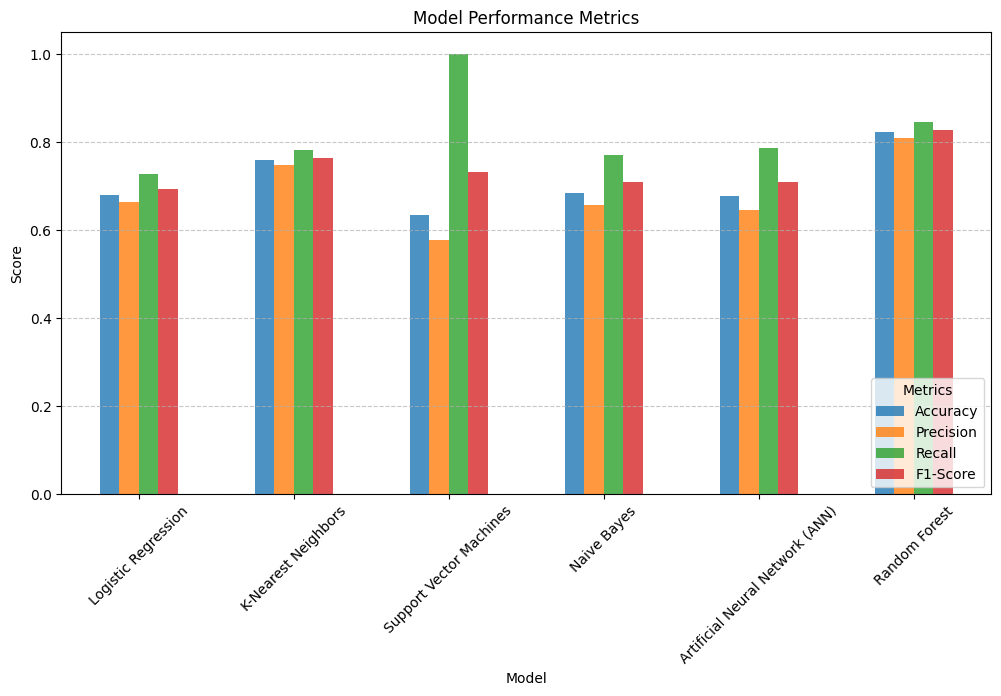

In [14]:
# Extract metrics from results
performance_metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
filtered_metrics_df = results_df[['Model'] + performance_metrics]

# Plot performance metrics
filtered_metrics_df.set_index('Model').plot(kind='bar', figsize=(12, 6), alpha=0.8)
plt.title("Model Performance Metrics")
plt.ylabel("Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right', title="Metrics")
plt.show()


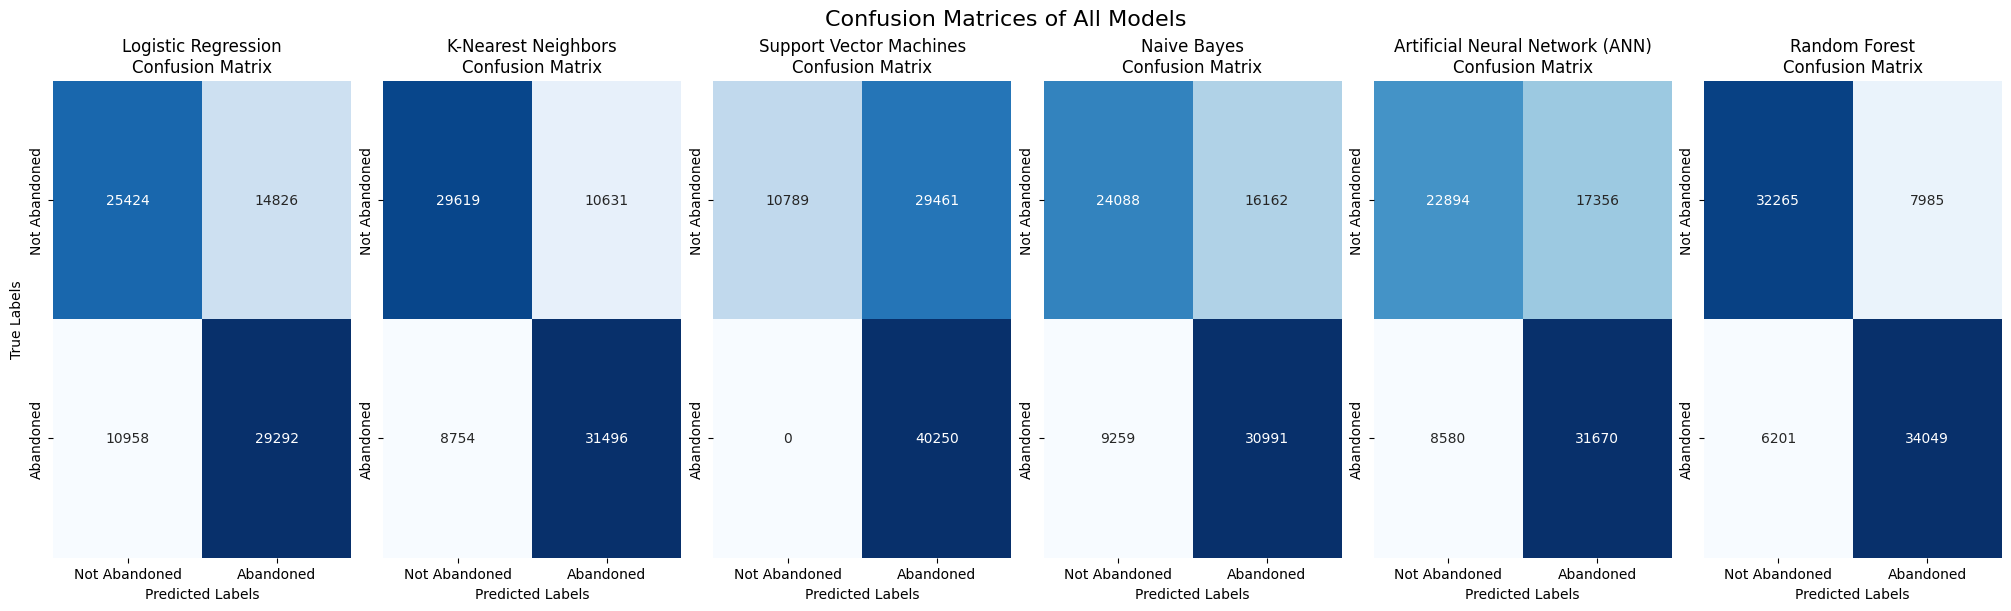

In [15]:
# Plot confusion matrices side by side
fig, axes = plt.subplots(1, len(results), figsize=(20, 6), constrained_layout=True)

for i, result in enumerate(results):
    cm = result['Confusion Matrix']
    model_name = result['Model']
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Not Abandoned', 'Abandoned'], 
                yticklabels=['Not Abandoned', 'Abandoned'], ax=axes[i])
    
    axes[i].set_title(f"{model_name}\nConfusion Matrix")
    axes[i].set_ylabel('True Labels' if i == 0 else '')  # Only the first plot has the y-axis label
    axes[i].set_xlabel('Predicted Labels')

plt.suptitle("Confusion Matrices of All Models", fontsize=16)
plt.show()


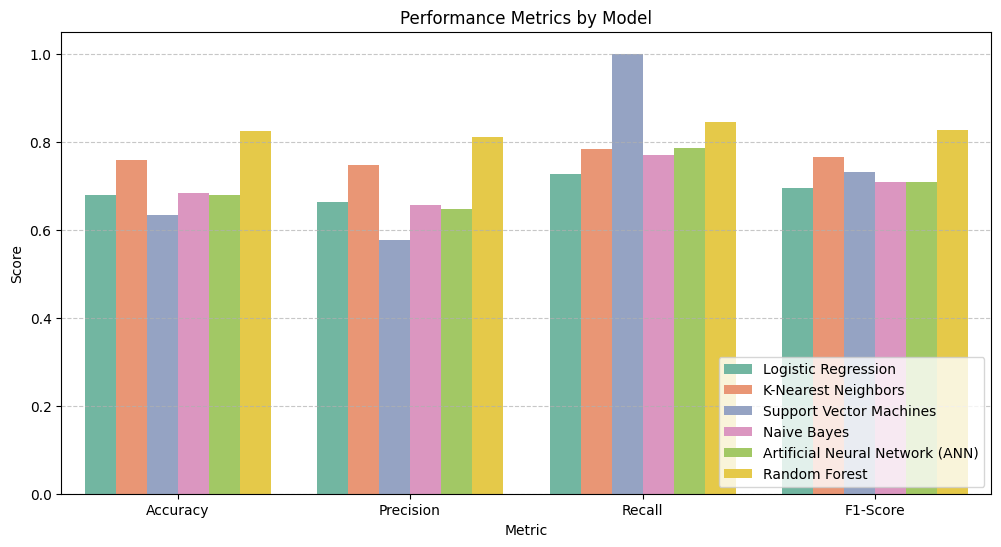

In [16]:
# Prepare data for grouped bar chart
metrics_melted = pd.melt(
    results_df, id_vars='Model', 
    value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    var_name='Metric', value_name='Score'
)

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=metrics_melted, x='Metric', y='Score', hue='Model', palette='Set2')
plt.title("Performance Metrics by Model")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.show()


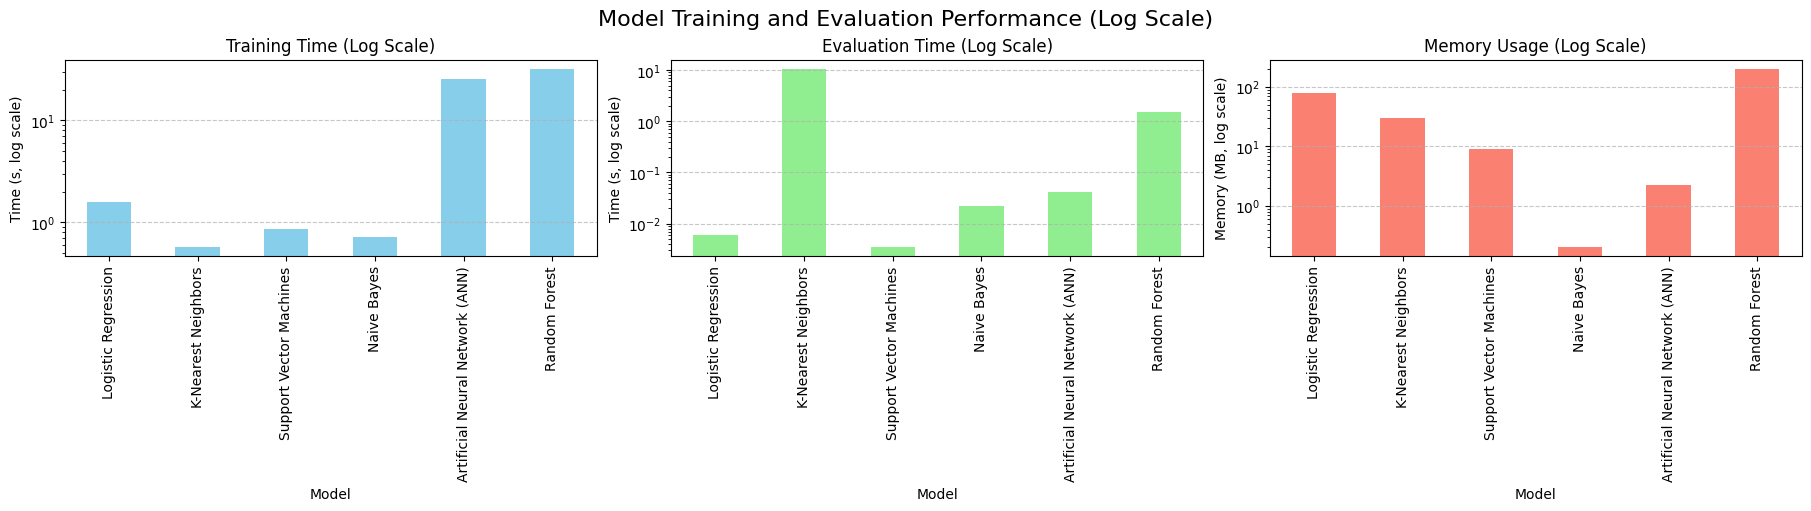

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)

# Training Time
results_df.plot(kind='bar', x='Model', y='Training Time (s)', ax=axes[0], color='skyblue', legend=False, logy=True)
axes[0].set_title('Training Time (Log Scale)')
axes[0].set_ylabel('Time (s, log scale)')
axes[0].set_xlabel('Model')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Evaluation Time
results_df.plot(kind='bar', x='Model', y='Evaluation Time (s)', ax=axes[1], color='lightgreen', legend=False, logy=True)
axes[1].set_title('Evaluation Time (Log Scale)')
axes[1].set_ylabel('Time (s, log scale)')
axes[1].set_xlabel('Model')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Memory Usage
results_df.plot(kind='bar', x='Model', y='Memory Used (MB)', ax=axes[2], color='salmon', legend=False, logy=True)
axes[2].set_title('Memory Usage (Log Scale)')
axes[2].set_ylabel('Memory (MB, log scale)')
axes[2].set_xlabel('Model')
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle("Model Training and Evaluation Performance (Log Scale)", fontsize=16)
plt.show()


## **Conclusion**

In this project, various supervised machine learning algorithms were applied to predict cart abandonment. The key findings are summarized below:

1. **Model Comparison**  
   Among the six models evaluated, the **Random Forest** model outperformed the others, achieving the highest accuracy (82.38%), precision (81.00%), recall (84.59%), and F1-score (82.76%). This makes Random Forest the most effective model for the task. However, it required the highest computational memory (199.71 MB) and longer training and evaluation times.

2. **Insights on Model Trade-offs**  
   - **Support Vector Machines (SVM)** achieved perfect recall (1.0), but at the cost of precision, resulting in significant false positives.  
   - **K-Nearest Neighbors (KNN)** performed well overall but had a high evaluation time (10.56s), making it less efficient for real-time predictions.  
   - Simpler models like **Logistic Regression** and **Naive Bayes** provided faster predictions with moderate performance, suitable for resource-constrained environments.

3. **Model Deployment Considerations**  
   Based on performance and efficiency, **Random Forest** is the most promising candidate for deployment where accuracy is prioritized. For scenarios with limited computational resources, **Logistic Regression** or **Naive Bayes** may be considered as alternatives.

4. **Future Work**  
   - Additional feature engineering and hyperparameter tuning can further improve model performance.  
   - Integrating ensemble techniques or deep learning architectures could enhance results.  
   - Exploring real-time implementation and testing on live e-commerce platforms will validate the model's practicality.

This study demonstrates the value of machine learning in addressing e-commerce challenges like cart abandonment. By predicting user behavior effectively, businesses can take proactive measures to reduce abandonment rates, improve user experience, and drive revenue growth.  


## **Appendices**

### **Appendix A: Performance Metrics**
The table below summarizes the performance metrics of the models evaluated for predicting cart abandonment:

| **Model**                       | **Accuracy** | **Precision** | **Recall** | **F1-Score** | **Training Time (s)** | **Evaluation Time (s)** | **Memory Used (MB)** |
|--------------------------------|-------------|--------------|-----------|-------------|-----------------------|-------------------------|---------------------|
| Logistic Regression            | 0.679702    | 0.663947     | 0.727752  | 0.694386    | 1.58                  | 0.0059                  | 77.79               |
| K-Nearest Neighbors (KNN)      | 0.759193    | 0.747644     | 0.782509  | 0.764679    | 0.57                  | 10.56                   | 29.98               |
| Support Vector Machines (SVM)  | 0.634025    | 0.577384     | 1.000000  | 0.732078    | 0.86                  | 0.0034                  | 8.94                |
| Naive Bayes                    | 0.684211    | 0.657243     | 0.769963  | 0.709152    | 0.71                  | 0.022                   | 0.20                |
| Artificial Neural Network (ANN)| 0.677814    | 0.645984     | 0.786832  | 0.709485    | 25.54                 | 0.041                   | 2.23                |
| Random Forest                  | **0.823776**| **0.810035** | **0.845938** | **0.827597** | 32.04                 | 1.49                    | **199.71**          |

---

### **Appendix B: Confusion Matrices**
The confusion matrices for each model are presented below:

1. **Logistic Regression**  
   - True Positive (Abandoned): 29,292  
   - False Negative: 10,958  
   - False Positive: 14,826  
   - True Negative (Not Abandoned): 25,424  

2. **K-Nearest Neighbors (KNN)**  
   - True Positive: 31,496  
   - False Negative: 8,754  
   - False Positive: 10,631  
   - True Negative: 29,619  

3. **Support Vector Machines (SVM)**  
   - True Positive: 40,250  
   - False Negative: 0  
   - False Positive: 29,461  
   - True Negative: 10,789  

4. **Naive Bayes**  
   - True Positive: 30,991  
   - False Negative: 9,259  
   - False Positive: 16,162  
   - True Negative: 24,088  

5. **Artificial Neural Network (ANN)**  
   - True Positive: 31,670  
   - False Negative: 8,580  
   - False Positive: 17,356  
   - True Negative: 22,894  

6. **Random Forest**  
   - True Positive: **34,049**  
   - False Negative: 6,201  
   - False Positive: 7,985  
   - True Negative: **32,265**

## References
- **Dataset**
   - Kaggle Link: [Dataset](https://www.kaggle.com/datasets/zusmani/pakistans-largest-ecommerce-dataset/data)
- **Logistic Regression**  
   - Scikit-Learn Documentation: [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

- **K-Nearest Neighbors (KNN)**  
   - Scikit-Learn Documentation: [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

- **Support Vector Machines (SVM)**  
   - Scikit-Learn Documentation: [SVC (Support Vector Classification)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

- **Naive Bayes**  
   - Scikit-Learn Documentation: [GaussianNB (Naive Bayes)](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

- **Artificial Neural Networks (MLPClassifier)**  
   - Scikit-Learn Documentation: [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

- **Random Forest**  
   - Scikit-Learn Documentation: [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
